# DSA Practice Programming Lab
The goal of this lab is to review the concepts seen in class so far, and to use some of the tools not already implemented for homework. This will be a good starting point to prepare for the midterm exam so make notes of any questions/areas that you find more difficult. 

The first few questions were taken from Cracking the Coding Interview, 6th edition. 

## Question 1: 
Given a short string $s1$ and a long string $s2$, write a function that counts how many permutations of $s1$ are found in $s2$. Also, give the runtime analysis (should be O($n1*n2$) where $n1$ is the length of $s1$ and $n2$ is the length of $s2$). This is roughly linear in $n2$ if $n1$ is small. 

Example: Your function should return three permutations for $s1$ = 'ab', $s2$ = 'baba' (starting at indices 0, 1, 2).

In [69]:
s1 = 'ab'
s2 = 'baba'

def perm_finder(s1, s2):

  perm_counter = 0 # O(1)
  s1_sum = 0 # O(1)
  enc = {} # O(1)
  ord_a = ord('a') # O(1)
  for index in range(0,26): # O(25) - Constant runtime
    enc[ord_a + index] = 2**index + 1000000
  
  for char in s1: # O(n1)
    s1_sum += enc[ord(char)]
  
  for ind in range(len(s2)): #O(n2)
    temp_sum = 0 
    current_combination = s2[ind : ind + len(s1)]
    
    for comb_char in current_combination: #O(n2/n1)
      temp_sum += enc[ord(comb_char)]

    if temp_sum == s1_sum:
      perm_counter += 1

  return perm_counter

perm_finder(s1, s2)

3

We have mentioned the runtime anaylsis for each of the steps as comments in the program. Starting off of that, we can say that this program runs in linear-ish runtime, considering the relative magnitudes of n1 and n2 - theoretically it will be O(n1*n2) for this program. We map each letter to a unique hash then when we sum them up, there is in theory only one sum of characters that matches any other sum of characters. This way, we don't care about order in permutations, but we still campture all permutations in a reasonably efficient runtime.

## Question 2: 
Given a list $l$ of integers and an integer value $x$, write a function that finds a pair of indices $i,j$ ($i \neq j$) such that $l[i]+l[j] = x$. Your runtime should be O($n$), where $n$ is the length of $l$.

Example: Your function should return 0,2 for $l = [3, -4, 1, 5, 2, 4]$ and $x = 4$.

In [70]:
def find_pair(l, x):
  list_dict = {}
  sum_sub = {}
  count = 0
  indicies = []

  # fill a dict with the list and a second with the sum-list and no repeats
  for i in range(len(l)):
    if (list_dict.get(i) == None):
      list_dict[i] = l[i]
      sum_sub[x - l[i]] = i
      count += 1
      indicies.append(i)

  for i in range(count):
    # check if the number that adds to the sum is in the other dict and they aren't the same index
    if (sum_sub.get(list_dict.get(indicies[i])) != None and indicies[i] != sum_sub.get(list_dict.get(indicies[i]))):
      return [indicies[i], sum_sub.get(list_dict.get(indicies[i]))]

l = [3, -4, 1, 5, 2, 4]
x = 4
print (find_pair(l, x))

[0, 2]


This function works by creating a dictionary filled with the list and a second dictionary with the sum minus the list. If you know one number, there is only one other number that adds to the sum and by creating these two dictionaries, you can check if the complement that adds to the sum exists or not. Then, by keeping track of the indicies and ensuring there are no duplicates, you can check in O(1) time if there is a complement while looping through the dict in O(n) time --> O(2n) --> O(n) time overall

## Question 3: 
Write a function that takes in two lists $l1$ and $l2$ and returns whether $l2$ is a rotation of $l1$ in $O(n1+n2)$ time, where $n1$ is the length of $l1$ and $n2$ is the length of $l2$. 

Example: Your function should return True for $11 = [h,e,l,l,o]$, $l2 = [e,l,l,o,h]$.

In [71]:
def rotation(l1, l2):

  # Intializes two empty strings
  sl1 = ""
  sl2 = ""
  
  # Creates a string from all the elements in list 1
  for char in l1:
    sl1 += char

  # Creates a string from all the elements in list 2
  for char in l2:
    sl2 += char

  # Concatenation occurs here
  sl2 += sl2
  if sl1 in sl2:
    return True
  
l1 = ['h','e','l','l','o']
l2 = ['e','l','l','o','h']
(rotation(l1, l2))

True

For the function 'rotation,' we used the .includes function in the Python library, which checks for if the given string is included in another string in O(n) runtime. We have created two strings, one containg the elements of l1, the other containg elements of l2. The concatenation trick here is to concatenate l2 to itself, to create a string as follows:
if l1 = "sparsh" and l2 = "rshspa"
concatenated l2 = "rshsparshspa"
We can observe that if l2 is a rotation of l1, we will have at least one occurence of l1 in concatenated l2. On this new list, we run the includes function and print the result.

## Question 4: 
Given a list $l$ that is a rotation of a sorted list, write a function that returns the index with the minimum element in O($log n$), where $n$ is the length of $l$.

Example: Your function should return 3 for $l = [4.5, 6, 8.2, 0, 1.3, 1.4]$.

In [0]:
def min_index_sorted(l):
  # finds the min index of a rotated sorted list
  offset = 0

  while(len(l) > 1):
    # cut in half every time
    cur_index = (int)(len(l)/2)
    if(l[cur_index - 1] > l[cur_index]):
      # found the correct min index
      return cur_index + offset
    elif(l[-1] < l[cur_index]):
      # move to the right side
      offset += cur_index
      l = l[cur_index:]
    else:
      l = l[:cur_index]
  
  # case where the list is sorted and not rotated
  return 0

l = [1, 3, 6, 7, 8, 9, 11]
print(min_index_sorted(l))

l = [3, 5, 7, 9, 11, 2]
print(min_index_sorted(l))

l = [5, 6, 1, 2, 3, 4]
print(min_index_sorted(l))

l = [4, 5, 6, 1, 2, 3]
print(min_index_sorted(l))

0
5
2
3


Theoretically, we are going to iterate through and cut the list in half every time while searching for a minimum. The way we know if we have found the minimum is based on if the element to the left of that index is greater than the element we are focused on. We know this because the list is a rotation of a sorted list. Furthermore, we can decide if we need to focus on the left or right side based on the last element of the list. Following this until we find an element creates an O(logn) time function that finds the minimum index. 

## Question 5: 
Implement an in-place version of Merge Sort using the doubly linked list class you implemented for homework 2.

In [0]:
# Defines a single node
class Node:
    def __init__(self,val=None,next=None,prev=None):
        # Value stored in the list element
        self.val = val
        # Pointer to the next node
        self.next = next
        # Pointer to the previous node
        self.prev = prev

class DLL:
    def __init__(self,head=None,tail=None,length=None):
        ''' Constructor for an empty list '''
        self.head = None
        self.tail = None
        self.len = 0
        # Recommendation - good thing to use sentinal nodes

    def length(self):
        ''' Returns the number of nodes in the list '''
        # Method 1 - Iteration through the list - bigger O time
        # than mantaining self.len during pushes and deletes
        # 
        # i = self.head
        # count = 0
        # while i.next:
        #     i = i.next
        #     count +=1
        # return count

        # Method 2 - This class keeps track of the count as functions are called
        return self.len

    def push(self, val):
        ''' Adds a node with value equal to val to the front of the list '''

        new = Node(val)
        # Case I - when the list does not contain nodes with values
        if self.len == 0:
            self.head = new
            self.len += 1
            self.tail = new

        # Case II - when the list contains only one node with a value
        elif self.len == 1:
            new.next = self.head
            self.head.prev = new
            self.head = new
            self.tail = new.next
            self.tail.prev = self.head
            self.len += 1

        # All other cases
        else:
            new.next = self.head
            self.head.prev = new
            self.head = new
            self.len += 1

    def insert_after(self, prev_node, val):
        ''' Adds a node with value equal to val in the list after prev_node '''
        # Case for lengh = 0
        new = Node(val)
        # Case I - If the node after prev_node is the tail
        if prev_node == self.tail:
            prev_node.next = new
            new.next = None
            new.prev = prev_node
            self.tail = new
            self.len += 1

        # All other cases
        else:
            new.next = prev_node.next
            prev_node.next = new
            new.prev = prev_node
            new.next.prev = new
            self.len += 1

    def delete(self, node):
        ''' Removes node from the list '''

        #Case 0 : Case with one node
        # Case I - If the given node is the head of the list
        if node == self.head:
            self.head = self.head.next
            self.head.prev = None
            self.len -= 1
        
        # Case II - if the given node is the tail of the list
        elif node == self.tail:
            self.tail = self.tail.prev
            self.tail.next = None
            self.len -= 1
        
        # All other cases
        else: 
            prev_node = node.prev
            next_node = node.next
            prev_node.next = next_node
            next_node.prev = prev_node
            self.len -= 1
        
    def index(self, i):
        ''' Returns the node at position i (i<n) '''
        # Include the cases for negative numbers and greater than the length
        n = self.head
        while i != 0:
            n = n.next
            i -= 1
               
        return n

    def multiply_all_pairs(self):
        ''' Multiplies all unique pairs of nodes values for nodes i, j (i != j) 
        and returns the sum '''

        # A nested for loop that mulitplies each node with every other node,
        # and then subtracts the product of each node with itself to come
        # up with the required multiplication. The last process is to divide
        # the result by the number of (nodes - 1)
        # The mathematical function used: (a + b + ....)^2

        # Method 1
        # sum = 0
        # for i in range(self.len):
        #     node = self.index(i)
        #     sum -= ((node.val)**2)
        #     for j in range(self.len):
        #         sum += ((node.val)*((self.index(j)).val))
        # return sum/2

        # Method 2
        sum = 0
        subsum = 0
        for i in range(self.len):
            node = self.index(i)
            subsum += node.val
            sum -= ((node.val)**2)
        sum += subsum**2
        return sum/2    

    def listmaker(self):
        '''
        Acknowledgement for the idea of generating this function - Casey May
        '''

        lst = []
        n = self.head
        while n != None:
            lst.append(n.val)
            n = n.next
        return lst

      # Credits: https://www.geeksforgeeks.org/merge-sort-for-doubly-linked-list/
      # Function to merge two linked list
    def merge(self, a, b):

        # If first linked sublist is empty 
        if a is None: 
            return b  
          
        # If secon linked sublist is empty  
        if b is None: 
            return a 
  
        # Pick the smaller value 
        if a.val < b.val: 
            a.next = self.merge(a.next, b) 
            a.next.prev = a 
            a.prev = None   
            return a 
        else: 
            b.next = self.merge(a, b.next) 
            b.next.prev = b 
            b.prev = None
            return b

    # Function to do merge sort
    
    def mergeSort(self, temp_head):
        
        # Checks if the length of the list or sublist is of length 0 - the two
        # if loops check for both even and odd lengths.
        if temp_head is None:  
            return temp_head 
        
        if temp_head.next is None: 
            return temp_head 
        

        second = self.split(temp_head) 
          
        # Recur for left and righ halves 
        temp_head = self.mergeSort(temp_head) 
        second = self.mergeSort(second) 
  
        # Merge the two sorted halves 
        return self.merge(temp_head, second) 
  
    # Split the doubly linked list (DLL) into two DLLs 
    # of half sizes 
    def split(self, tempHead): 
 
        fast = slow =  tempHead 
        while(True): 
            # The while loops carries on until the value fast is assigned to the
            # last or the second to last element of the list or a sublist based
            # on if its length is even or odd
            if fast.next is None: 
                break
            if fast.next.next is None: 
                break
            fast = fast.next.next 
            slow = slow.next
        
        # Stores the temporary node to split the list at this node
        # by reassinging the 
        temp = slow.next
        slow.next = None
        return temp 

# Driver program to test the above functions 
dll = DLL() 
dll.push(60) 
dll.push(17); 
dll.push(9); 
dll.push(30); 
dll.push(700) 
dll.push(109); 
dll.head = dll.mergeSort(dll.head)
dll.listmaker()

[9, 17, 30, 60, 109, 700]

# Challenges 
Pick at least one of the following challenges. I recommend the first one if you'd like to practice divide-and-conquer algorithms.

## Challenge 1 - Skyline Problem
Given a list of buildings including their positions and heights, find the skyline visible using a divide-and-conquer approach. See image below for a skyline example. First, you should think about how you will represent a building and how you will represent the outputted skyline. You may assume all buildings are rectangular (what a boring city). 

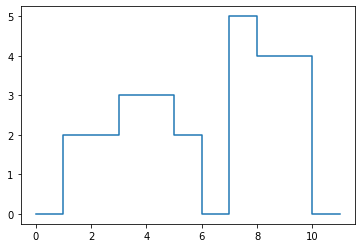

In [66]:
import matplotlib.pyplot as plt
plt.step([i for i in range(12)], [0,0,2,2,3,3,2,0,5,4,4,0])

In [74]:
# building = (left, right, height)
## WE used help from dieter to build this
buildings = [(1,6,7), (3,8,9), (7,10,2), (10,13,12)]

def splitter(buildings):
  # list of skylines by new coordinates

  # base case where there is only one building
  if len(buildings) == 1:
    l, r, h = buildings[0]
    return [(l, h), (r, 0)]

  mid = len(buildings) // 2
  left = splitter(buildings[:mid])
  right = splitter(buildings[mid:])

  return merge_skylines(left, right)
  
def merge_skylines(left, right):
  # takes two skylines and merges them
  # height trackers for skyline 1 and 2
  hl = hr = i = j = current_height = 0
  new_skyline = []

  # loop through significant elements
  while i < len(left) and j < len(right):
    # get left positions
    left_x = left[i][0]
    right_x = right[j][0]

    # find the relative heights for left and right skyline
    if (left_x <= right_x):
      hl = left[i][1]
      i += 1
    if (right_x <= left_x):
      hr = right[j][1]
      j += 1

    # check if there is a new max height and update current height
    if (max(hr,hl) != current_height):
      current_height = max(hr, hl)
      new_skyline.append((min(right_x, left_x), current_height))

  # add the excess if one of the skylines has no more elements
  new_skyline.extend(right[j:])
  new_skyline.extend(left[i:])
  return new_skyline

            
splitter(buildings)


[(1, 7), (3, 9), (8, 2), (10, 12), (13, 0)]

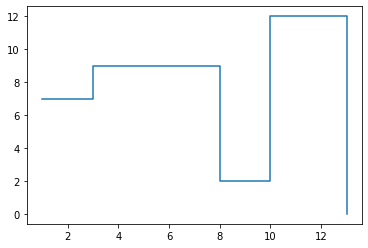

In [75]:
res = splitter(buildings)
plt.step([i[0] for i in res], [i[1] for i in res], where='post')

In this case, we are using a mergesort-esque function that splits buildings down until they are a bunch of individual buildings by cutting in half and then building back up. While cutting in half, we are running through the list in O(logn) time, but in every iteration, we have to iterate through a list of all the building elements which can be up to n points, making the runtime O(nlogn). 

## Challenge 2 - Minesweeper
Design an object class to represent the game of minesweeper. Think about how the way you represent the game will impact the runtime of updating the grid. You may also want to allow the user to start a game with different difficulty levels. 

If you want to add some funk, think about how you can change the structure or elements of the game (maybe the landscape isn't a grid? are there fun surprises to uncover?)